In [ ]:
pip install pycaret[full]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 49.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This c

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = '/content/drive/My Drive/Datamining/airline-passengers.csv'
data = pd.read_csv(file_path)

data.head()

Mounted at /content/drive


,month,total_passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [18]:
import time
import numpy as np
import pandas as pd

from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

<Axes: >

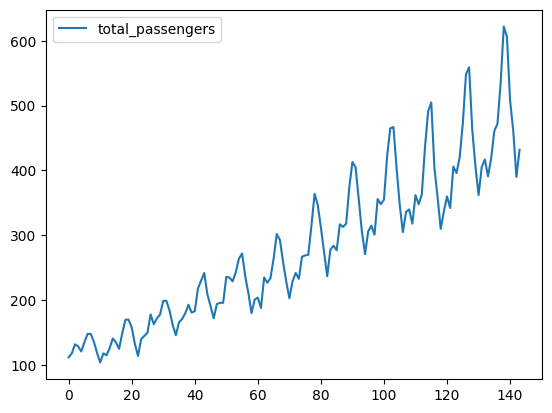

In [3]:
data.plot()

In [7]:
import pandas as pd

data['month'] = pd.to_datetime(data['month'])
data.set_index('month', inplace=True)

In [8]:
from pycaret.time_series import *
s = setup(data, target='total_passengers', fh=3, session_id=123, use_gpu= True)

,Description,Value
0,session_id,123
1,Target,total_passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

In [9]:
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

In [10]:
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [11]:
exp.setup(data, fh = 3, session_id = 123, use_gpu= True)

,Description,Value
0,session_id,123
1,Target,total_passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

In [21]:
from pycaret.time_series import TSForecastingExperiment

# Initialize the experiment
eda = TSForecastingExperiment()

# Configure figure settings
fig_kwargs = {
    "renderer": "png",  # Use "png" for rendering in environments that do not support interactive plots
    "width": 1000,
    "height": 600,
}

# Setup the experiment with data, forecast horizon (fh), and figure arguments
eda.setup(data=data, target='total_passengers', fh=12, fig_kwargs=fig_kwargs)

,Description,Value
0,session_id,1461
1,Target,total_passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Description,Value
0,session_id,6372
1,Target,total_passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


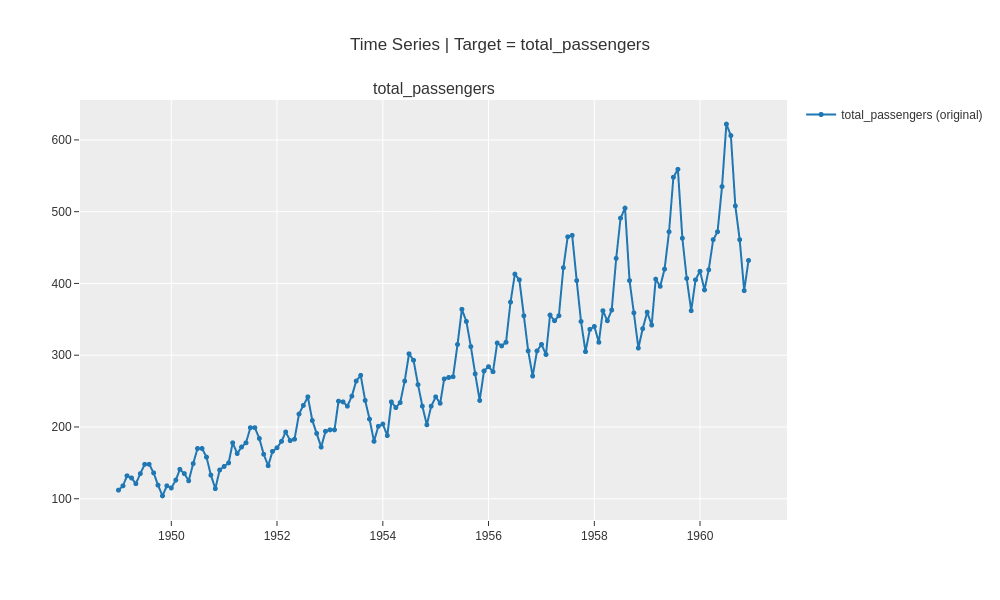

In [25]:
from pycaret.time_series import TSForecastingExperiment

eda = TSForecastingExperiment()

# Configure figure settings
fig_kwargs = {
    "renderer": "png",  # Use "png" for rendering in environments that do not support interactive plots
    "width": 1000,
    "height": 600,
}

# Setup the experiment with data, forecast horizon (fh), and figure arguments
eda.setup(data=data, target='total_passengers', fh=12, fig_kwargs=fig_kwargs)

eda.plot_model()

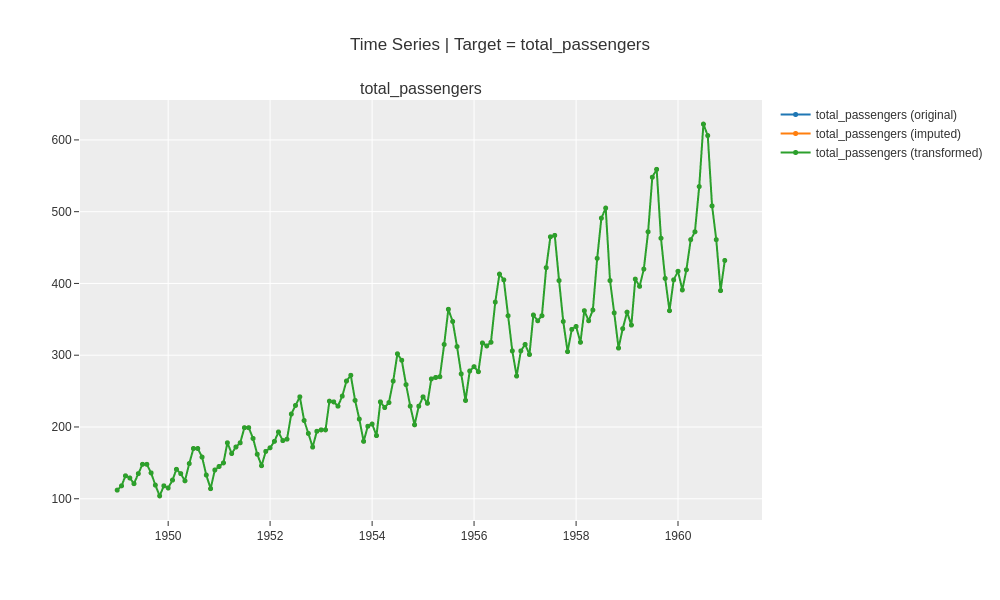

In [26]:
eda.plot_model(data_kwargs={"plot_data_type": ["original", "imputed", "transformed"]})

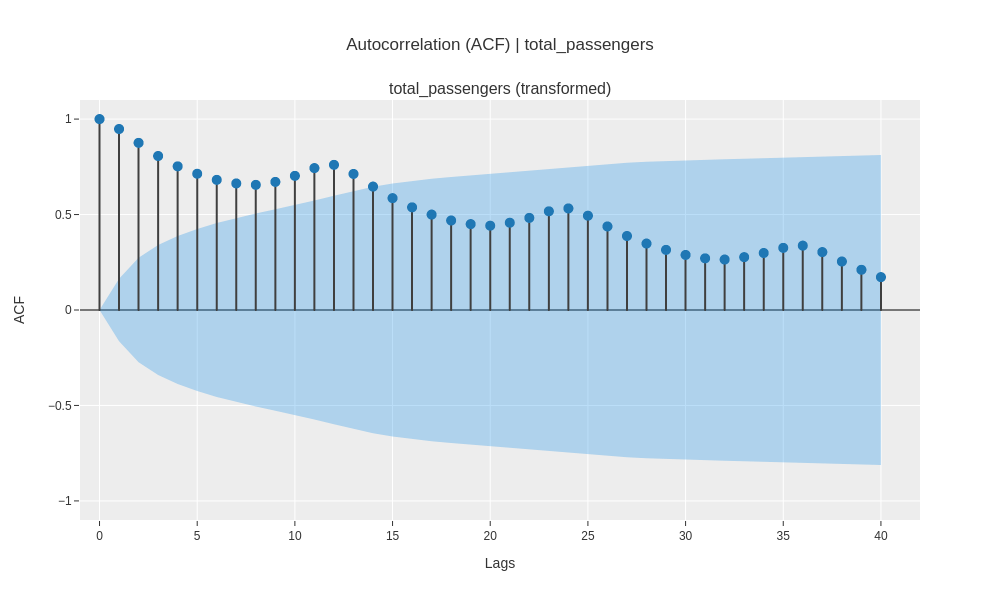

In [27]:
eda.plot_model(plot="acf")

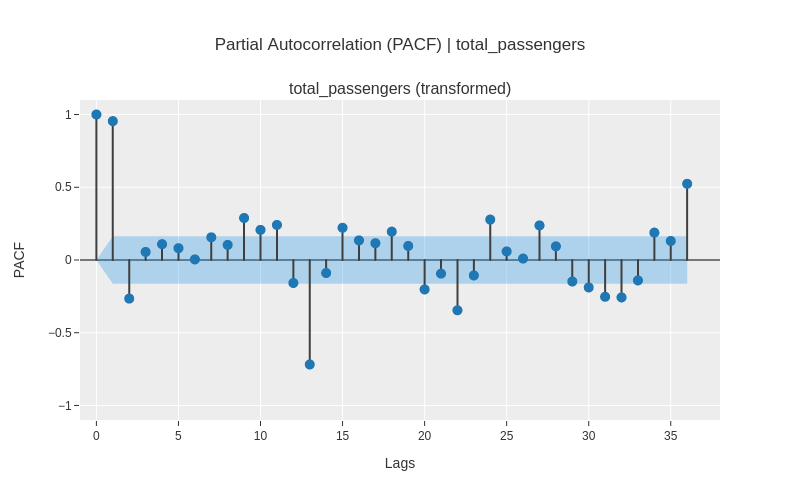

In [28]:

eda.plot_model(plot="pacf", data_kwargs={'nlags':36}, fig_kwargs={'height': 500, "width": 800})

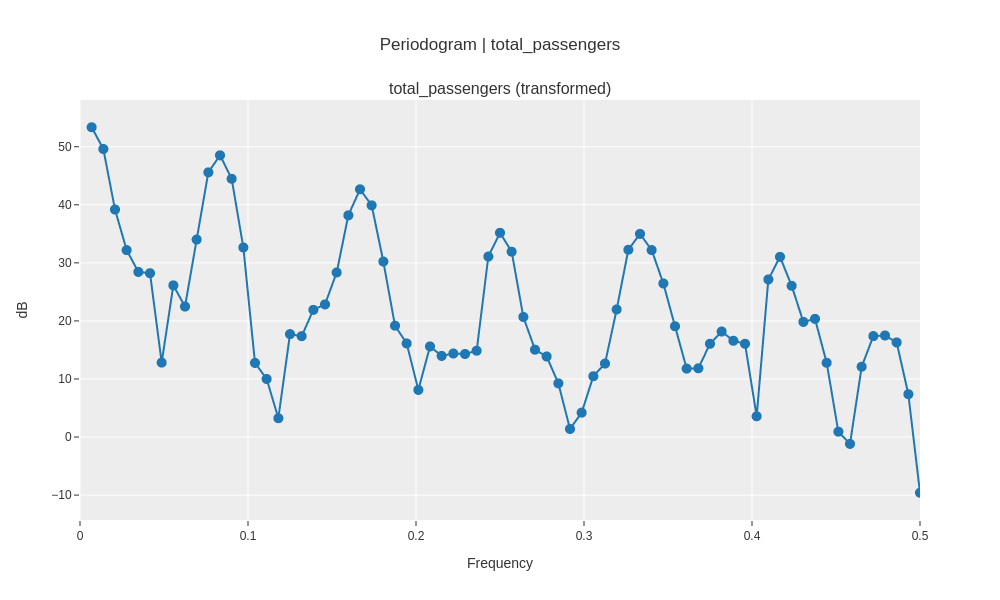

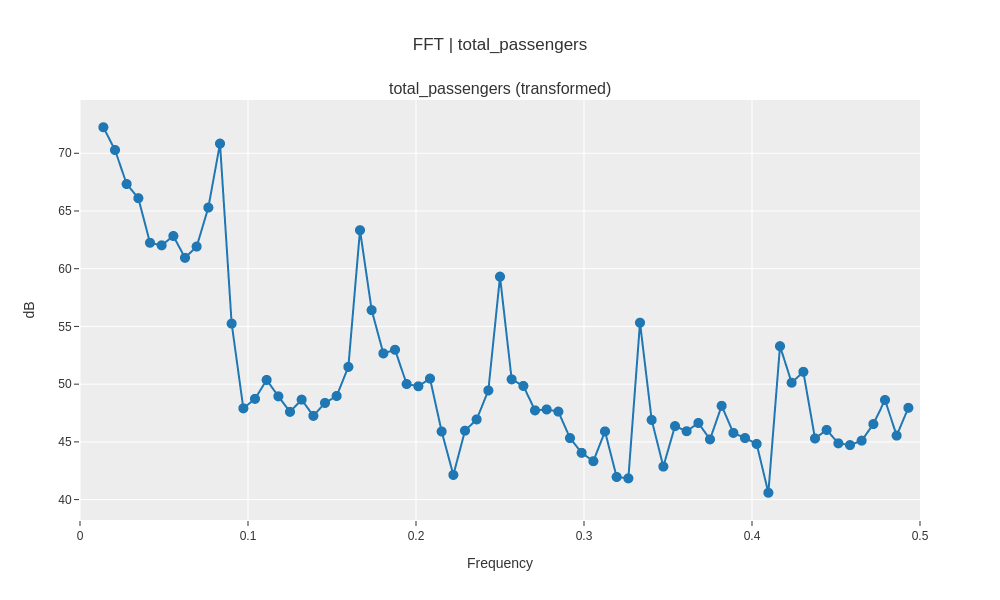

In [29]:
eda.plot_model(plot="periodogram")
eda.plot_model(plot="fft")

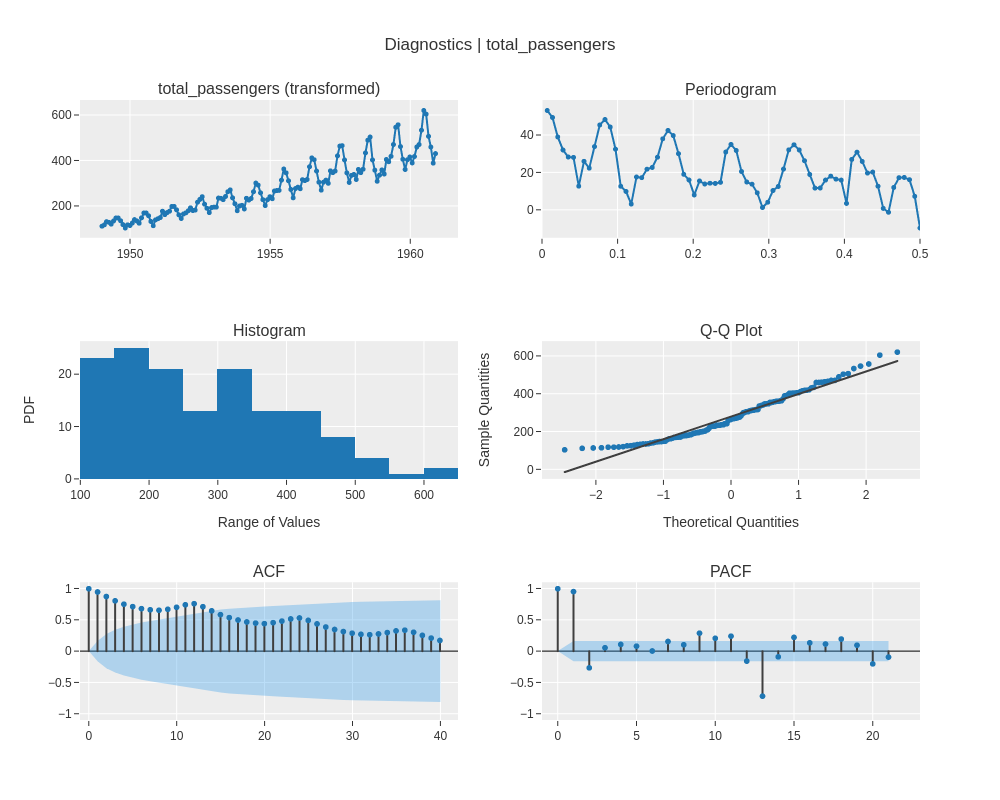

In [30]:
eda.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})

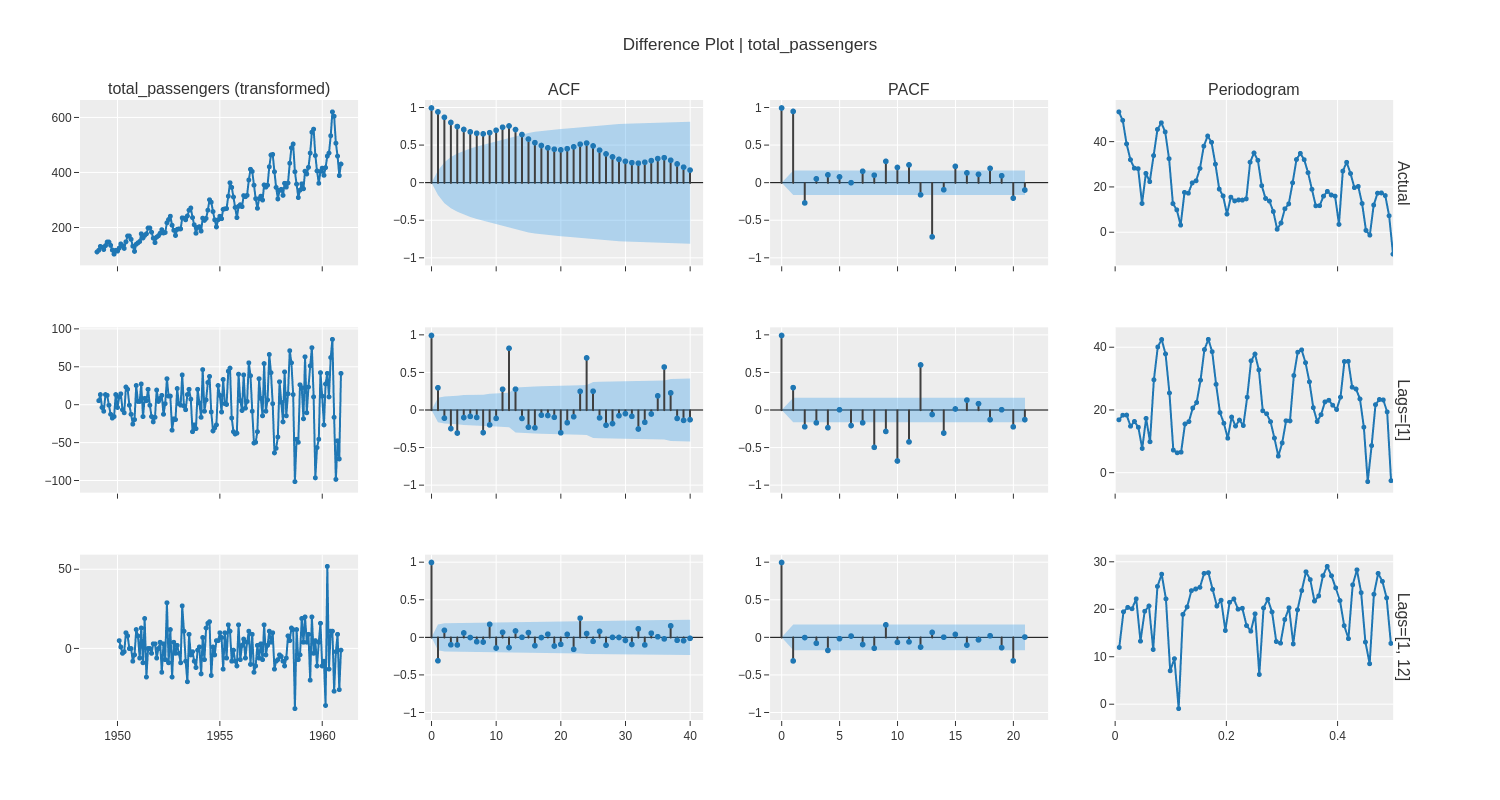

In [31]:
eda.plot_model(
    plot="diff",
    data_kwargs={"lags_list": [[1], [1, 12]], "acf": True, "pacf": True, "periodogram": True},
    fig_kwargs={"height": 800, "width": 1500}
)

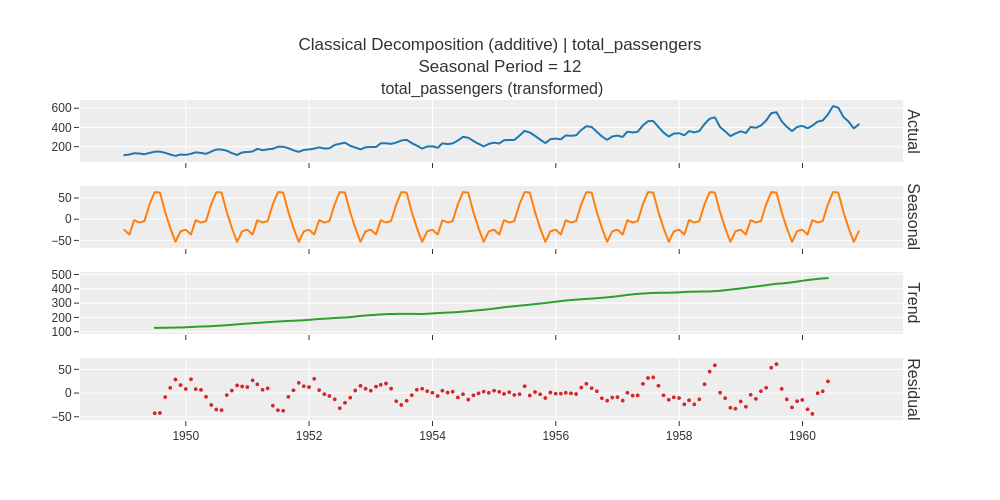

In [32]:
eda.plot_model(plot="decomp", fig_kwargs={"height": 500})

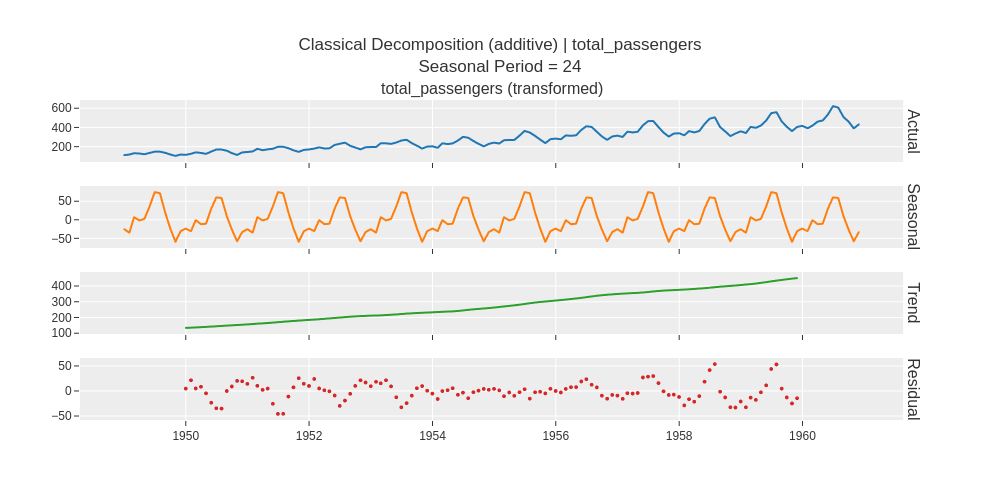

In [33]:

eda.plot_model(plot="decomp", data_kwargs={'seasonal_period': 24}, fig_kwargs={"height": 500})

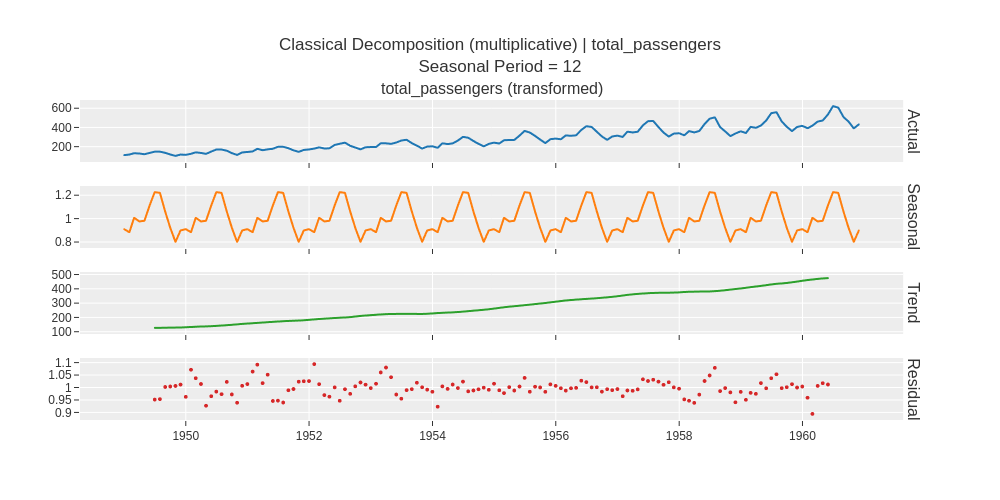

In [34]:
eda.plot_model(plot="decomp", data_kwargs={'type': 'multiplicative'}, fig_kwargs={"height": 500})

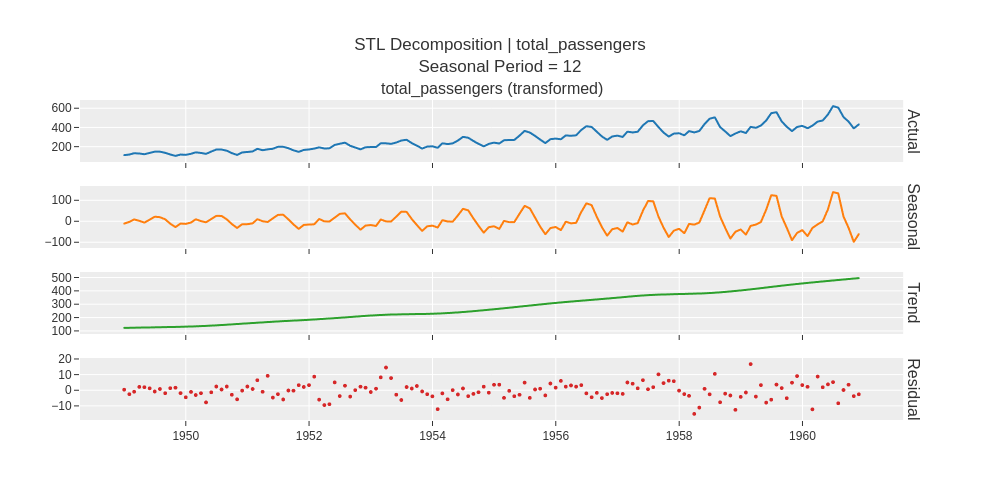

In [35]:
eda.plot_model(plot="decomp_stl", fig_kwargs={"height": 500})

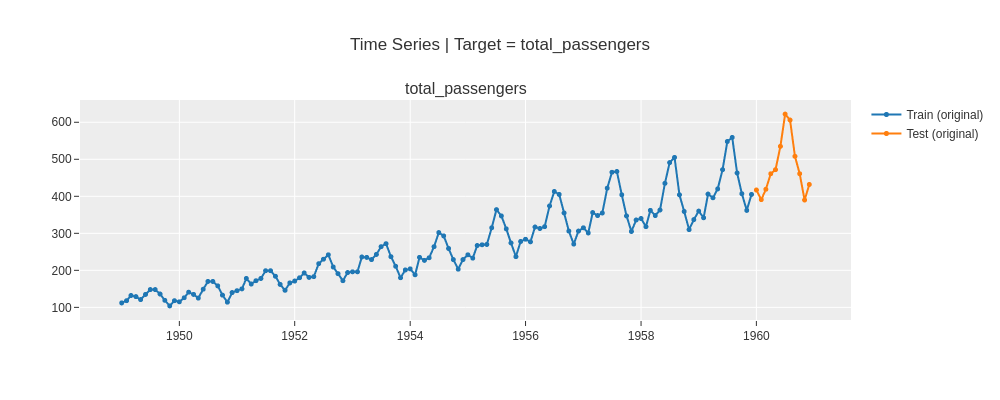

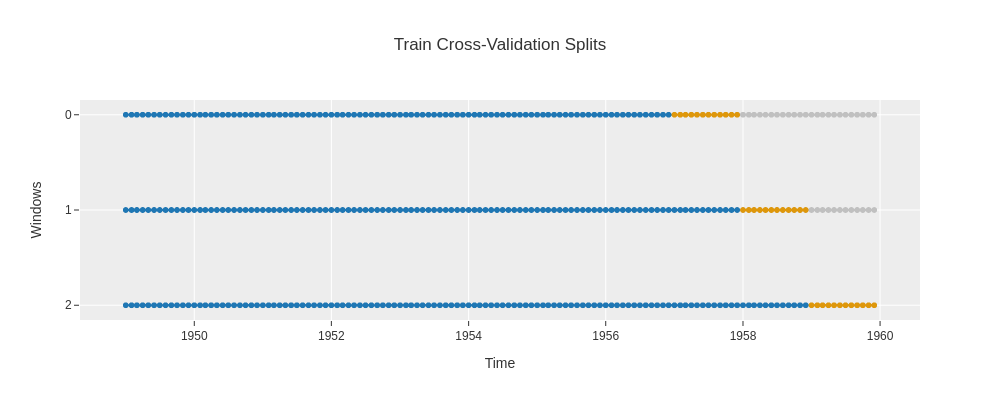

In [38]:
eda.plot_model(plot="train_test_split", fig_kwargs={"height": 400, "width": 1000})
eda.plot_model(plot="cv", fig_kwargs={"height": 400, "width": 1000})

In [39]:
eda.check_stats(test='stationarity')

,Test,Test Name,Data,Property,Setting,Value
0,Stationarity,ADF,Transformed,Stationarity,{'alpha': 0.05},False
1,Stationarity,ADF,Transformed,p-value,{'alpha': 0.05},0.99188
2,Stationarity,ADF,Transformed,Test Statistic,{'alpha': 0.05},0.815369
3,Stationarity,ADF,Transformed,Critical Value 1%,{'alpha': 0.05},-3.481682
4,Stationarity,ADF,Transformed,Critical Value 5%,{'alpha': 0.05},-2.884042
5,Stationarity,ADF,Transformed,Critical Value 10%,{'alpha': 0.05},-2.57877
6,Stationarity,KPSS,Transformed,Trend Stationarity,{'alpha': 0.05},True
7,Stationarity,KPSS,Transformed,p-value,{'alpha': 0.05},0.1
8,Stationarity,KPSS,Transformed,Test Statistic,{'alpha': 0.05},0.09615
9,Stationarity,KPSS,Transformed,Critical Value 10%,{'alpha': 0.05},0.119


In [40]:
eda.check_stats(test='white_noise')

,Test,Test Name,Data,Property,Setting,Value
0,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817
1,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 48}",1933.155822
2,White Noise,Ljung-Box,Transformed,p-value,"{'alpha': 0.05, 'K': 24}",0.000000
3,White Noise,Ljung-Box,Transformed,p-value,"{'alpha': 0.05, 'K': 48}",0.000000
4,White Noise,Ljung-Box,Transformed,White Noise,"{'alpha': 0.05, 'K': 24}",0.000000
5,White Noise,Ljung-Box,Transformed,White Noise,"{'alpha': 0.05, 'K': 48}",0.000000


In [41]:
eda.check_stats(test='kpss', alpha = 0.2)

,Test,Test Name,Data,Property,Setting,Value
0,Stationarity,KPSS,Transformed,Trend Stationarity,{'alpha': 0.2},False
1,Stationarity,KPSS,Transformed,p-value,{'alpha': 0.2},0.1
2,Stationarity,KPSS,Transformed,Test Statistic,{'alpha': 0.2},0.09615
3,Stationarity,KPSS,Transformed,Critical Value 10%,{'alpha': 0.2},0.119
4,Stationarity,KPSS,Transformed,Critical Value 5%,{'alpha': 0.2},0.146
5,Stationarity,KPSS,Transformed,Critical Value 2.5%,{'alpha': 0.2},0.176
6,Stationarity,KPSS,Transformed,Critical Value 1%,{'alpha': 0.2},0.216


In [42]:
eda.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.5
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.58316
8,Summary,Statistics,Transformed,# Distinct Values,,118.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817


## Part 2 - Modelling

Modelling the data.

In [43]:
model = exp.create_model("arima", order=(1,1,0), seasonal_order=(0,1,0,12))

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-12,0.8574,0.9469,26.1067,32.7125,0.0633,0.0604,-5.5785
1,1960-03,1.2971,1.1526,39.7897,40.1228,0.0815,0.0850,-0.5146
2,1960-06,0.4807,0.4246,15.0808,15.1277,0.0265,0.0263,0.9099
Mean,NaT,0.8784,0.8414,26.9924,29.3210,0.0571,0.0572,-1.7277
SD,NaT,0.3336,0.3064,10.1068,10.4822,0.0229,0.0241,2.7843


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [44]:
y_predict = exp.predict_model(model)
y_predict

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,0.4764,0.4430,15.2127,16.0644,0.0363,0.0357,0.6962


,y_pred
1960-10,453.0417
1960-11,408.1438
1960-12,451.5361


In [45]:
exp.plot_model(estimator=model)


In [46]:
exp.check_stats(model)

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Residual,Length,,140.0
1,Summary,Statistics,Residual,# Missing Values,,0.0
2,Summary,Statistics,Residual,Mean,,-0.397261
3,Summary,Statistics,Residual,Median,,-0.5256
4,Summary,Statistics,Residual,Standard Deviation,,12.659139
5,Summary,Statistics,Residual,Variance,,160.253804
6,Summary,Statistics,Residual,Kurtosis,,3.511351
7,Summary,Statistics,Residual,Skewness,,-0.653099
8,Summary,Statistics,Residual,# Distinct Values,,136.0
9,White Noise,Ljung-Box,Residual,Test Statictic,"{'alpha': 0.05, 'K': 24}",27.888492


In [47]:
exp.plot_model(model, plot='diagnostics', fig_kwargs={"height": 800, "width": 1000})

In [48]:
exp.plot_model(model, plot='insample')

In [49]:
exp.plot_model(model, plot="decomp")
exp.plot_model(model, plot="decomp_stl")

In [50]:
model = exp.create_model("lightgbm_cds_dt")
y_predict = exp.predict_model(model)
exp.plot_model(estimator=model)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-12,0.5100,0.4791,15.5302,16.5507,0.0380,0.0387,-0.6840
1,1960-03,1.3552,1.1946,41.5693,41.5835,0.0854,0.0893,-0.6269
2,1960-06,1.7406,1.7349,54.6082,61.8141,0.0905,0.0959,-0.5046
Mean,NaT,1.2019,1.1362,37.2359,39.9827,0.0713,0.0746,-0.6051
SD,NaT,0.5139,0.5144,16.2451,18.5133,0.0237,0.0256,0.0748


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,LGBMRegressor,0.3053,0.2745,9.7490,9.9548,0.0232,0.0231,0.8834


In [51]:

tuned_model = exp.tune_model(model)
exp.plot_model(estimator=tuned_model)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-12,0.5407,0.6045,16.4639,20.8849,0.0394,0.0388,-1.6814
1,1960-03,1.2104,1.0751,37.1273,37.4240,0.0757,0.0787,-0.3177
2,1960-06,1.1063,1.0898,34.7078,38.8293,0.0578,0.0599,0.4063
Mean,NaT,0.9524,0.9231,29.4330,32.3794,0.0576,0.0591,-0.5309
SD,NaT,0.2942,0.2254,9.2236,8.1480,0.0148,0.0163,0.8656


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   25.8s finished


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


In [52]:
print(model)
print(tuned_model)

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=LGBMRegressor(n_jobs=-1, random_state=123), sp=12,
                    window_length=12)
BaseCdsDtForecaster(degree=7, deseasonal_model='multiplicative',
                    fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                               

In [53]:
exp.plot_model([model, tuned_model], data_kwargs={"labels": ["Baseline", "Tuned"]})

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


In [54]:
final_model = exp.finalize_model(tuned_model)
exp.plot_model(final_model)
exp.predict_model(final_model)

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


,y_pred
1961-01,449.8752
1961-02,439.5621
1961-03,504.3085


In [55]:
print(tuned_model)
print(final_model)

BaseCdsDtForecaster(degree=7, deseasonal_model='multiplicative',
                    fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=LGBMRegressor(bagging_freq=3, colsample_bytree=0.5,
              learning_rate=4.559379744551025e-06, max_depth=5,
              min_child_samples=76, n_estimators=139, n_jobs=-1, num_leaves=45,
              random_state=123, reg_alpha=2.8210427307018964e-05,
              reg_lambda=3.640786648416928e-08, subsample=0.5),
                    sp=12, window_length=20)
ForecastingPipeline(steps=[('forecaster',
                            

In [56]:
_ = exp.save_model(final_model, "my_final_model")

Transformation Pipeline and Model Successfully Saved


In [57]:
exp_load = TSForecastingExperiment()
loaded_model = exp_load.load_model("my_final_model")

Transformation Pipeline and Model Successfully Loaded


In [58]:
exp_load.predict_model(loaded_model)

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


,y_pred
1961-01,449.8752
1961-02,439.5621
1961-03,504.3085


In [59]:
exp.plot_model(estimator=final_model, data_kwargs={'fh': 36})

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging

## Part 3

In [63]:
fig_kwargs = {
    # "renderer": "notebook",
    "renderer": "png",
    "width": 1000,
    "height": 600,
}

exp = TSForecastingExperiment()
exp.setup(data=data, fh=12, fold=3, fig_kwargs=fig_kwargs, session_id=42)

,Description,Value
0,session_id,42
1,Target,total_passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [64]:

best_baseline_models = exp.compare_models(n_select=3)
best_baseline_models

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.5852,0.6105,17.1926,20.1633,0.0435,0.0439,0.8918,0.1500
ets,ETS,0.5931,0.6212,17.4165,20.5102,0.0440,0.0445,0.8882,0.2367
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6666,0.7255,19.6620,24.0121,0.0490,0.0489,0.8465,1.4867
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.6813,0.7866,20.0334,25.9670,0.0491,0.0499,0.8113,0.5300
arima,ARIMA,0.6830,0.6735,20.0069,22.2199,0.0501,0.0507,0.8677,0.3767
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.7004,0.7702,20.6084,25.4401,0.0509,0.0514,0.8215,0.7100
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.7004,0.7703,20.6086,25.4405,0.0509,0.0514,0.8215,0.5433
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.7029,0.7732,20.6816,25.5362,0.0511,0.0516,0.8201,0.5133
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.7048,0.7751,20.7373,25.6005,0.0512,0.0517,0.8193,1.3700
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.7048,0.7751,20.7366,25.6009,0.0512,0.0517,0.8192,0.8700


Processing:   0%|          | 0/123 [00:00<?, ?it/s]

[ExponentialSmoothing(seasonal='mul', sp=12, trend='add'),
 AutoETS(seasonal='mul', sp=12, trend='add'),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                         10, 9,
                                                                         8, 7, 6,
                                                                         5, 4, 3,
                                                                         2, 1]},
                                                    n_jobs=1)],
                     regressor=ExtraTreesRegressor(n_jobs=-1, random_state=42),
                     sp=12, window_length=12)]

In [65]:
compare_metrics = exp.pull()


In [66]:
best_tuned_models = [exp.tune_model(model) for model in best_baseline_models]
best_tuned_models

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.3617,0.4124,10.5620,13.4978,0.0272,0.0273,0.9407
1,1957-12,0.8588,0.8856,26.2573,30.0652,0.0738,0.0704,0.7632
2,1958-12,0.3942,0.4126,11.2644,13.4112,0.0261,0.0265,0.9598
Mean,NaT,0.5382,0.5702,16.0279,18.9914,0.0424,0.0414,0.8879
SD,NaT,0.2271,0.2230,7.2390,7.8304,0.0222,0.0205,0.0885


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.1s finished


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.3641,0.3969,10.6335,12.9923,0.0280,0.0281,0.9451
1,1957-12,1.0557,1.0278,32.2760,34.8945,0.0900,0.0854,0.6810
2,1958-12,0.4579,0.4697,13.0835,15.2667,0.0296,0.0302,0.9479
Mean,NaT,0.6259,0.6315,18.6643,21.0512,0.0492,0.0479,0.8580
SD,NaT,0.3063,0.2818,9.6767,9.8326,0.0288,0.0265,0.1251


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.9s finished


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,1.0549,1.2622,30.8068,41.3148,0.0755,0.0801,0.4444
1,1957-12,0.7417,0.8045,22.6769,27.3108,0.0589,0.0582,0.8046
2,1958-12,0.7252,0.8562,20.7230,27.8322,0.0448,0.0460,0.8267
Mean,NaT,0.8406,0.9743,24.7356,32.1526,0.0597,0.0614,0.6919
SD,NaT,0.1517,0.2047,4.3665,6.4822,0.0125,0.0141,0.1753


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   49.9s finished


[ExponentialSmoothing(seasonal='add', sp=12, trend='add', use_boxcox=True),
 AutoETS(seasonal='mul', sp=12, trend='add'),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                         10, 9,
                                                                         8, 7, 6,
                                                                         5, 4, 3,
                                                                         2, 1]},
                                                    n_jobs=1)],
                     regressor=ExtraTreesRegressor(n_jobs=-1, random_state=42),
                     sp=12, window_length=12)]

In [67]:
top_model_metrics = compare_metrics.iloc[0:3]['MAE']
display(top_model_metrics)

top_model_weights = 1 - top_model_metrics/top_model_metrics.sum()
display(top_model_weights)

,MAE
exp_smooth,17.1926
ets,17.4165
et_cds_dt,19.662


,MAE
exp_smooth,0.683209
ets,0.679083
et_cds_dt,0.637708


In [68]:
blender = exp.blend_models(best_tuned_models, method='mean', weights=top_model_weights.values.tolist())

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.3703,0.4756,10.8141,15.5674,0.0264,0.0269,0.9211
1,1957-12,0.7174,0.7209,21.9328,24.4725,0.0609,0.0587,0.8431
2,1958-12,0.5437,0.5535,15.5367,17.9920,0.0353,0.0362,0.9276
Mean,NaT,0.5438,0.5833,16.0946,19.3439,0.0409,0.0406,0.8973
SD,NaT,0.1417,0.1023,4.5563,3.7591,0.0146,0.0133,0.0384


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,EnsembleForecaster,0.3310,0.3904,10.0804,13.4888,0.0219,0.0217,0.9672


           y_pred
1960-01  411.8049
1960-02  392.7194
1960-03  453.3590
1960-04  443.1362
1960-05  464.3702
1960-06  531.1468
1960-07  606.6252
1960-08  614.9484
1960-09  508.5177
1960-10  451.2852
1960-11  402.6351
1960-12  435.1540


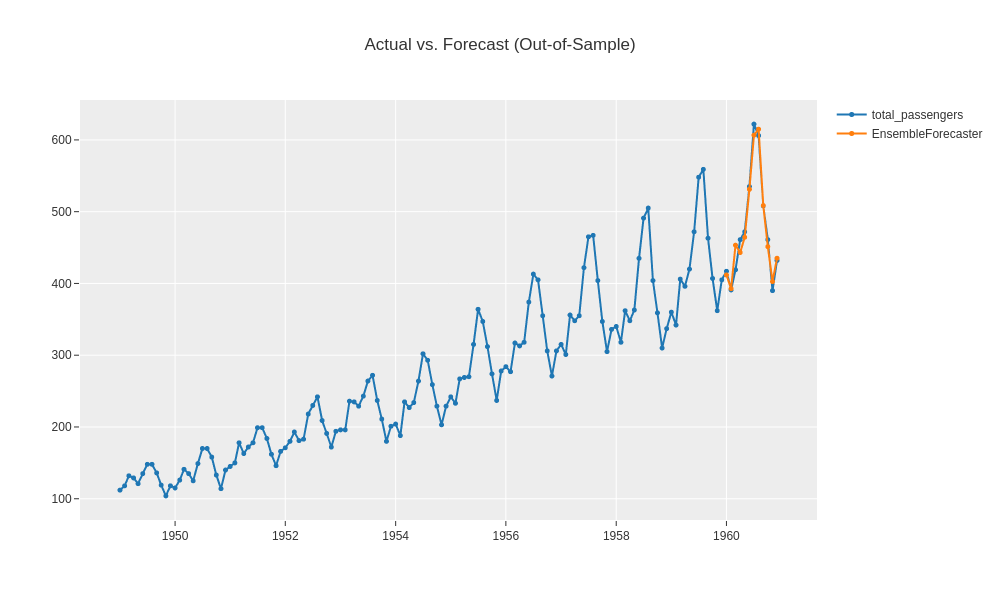

In [69]:
y_predict = exp.predict_model(blender)
print(y_predict)
exp.plot_model(estimator=blender)

           y_pred
1961-01  443.5568
1961-02  420.8623
1961-03  468.9008
1961-04  491.6614
1961-05  507.2296
1961-06  573.9883
1961-07  658.1668
1961-08  653.2689
1961-09  549.4467
1961-10  496.5341
1961-11  427.8801
1961-12  467.9969


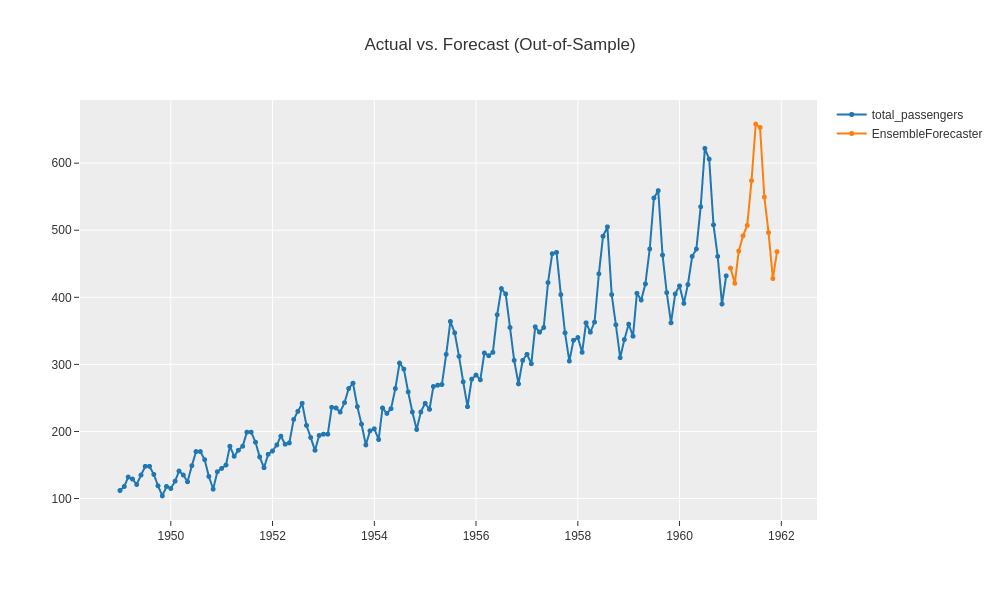

In [70]:
final_model = exp.finalize_model(blender)
print(exp.predict_model(final_model))
exp.plot_model(final_model)

In [71]:
_ = exp.save_model(final_model, "my_blender")

Transformation Pipeline and Model Successfully Saved


In [72]:
loaded_exp = TSForecastingExperiment()
m = loaded_exp.load_model("my_blender")
# Predictions should be same as before the model was saved and loaded
loaded_exp.predict_model(m)

Transformation Pipeline and Model Successfully Loaded


,y_pred
1961-01,443.5568
1961-02,420.8623
1961-03,468.9008
1961-04,491.6614
1961-05,507.2296
1961-06,573.9883
1961-07,658.1668
1961-08,653.2689
1961-09,549.4467
1961-10,496.5341


Easy it was to use the automated approach to model this data and we were able to achieve reasonale results.